## Assignment for Business Analyst Intern @Jar

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Reading data set

In [2]:
data = pd.read_excel("Walmart Sales.xlsx")

In [3]:
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date      Time  \
0       Health and beauty       74.69         7   1/5/2019  13:08:00   
1  Electronic accessories       15.28         5   3/8/2019  10:29:00   
2      Home and lifestyle       46.33         7   3/3/2019  13:23:00   
3       Health and beauty       58.22         8  1/27/2019  20:33:00   
4       Sports and travel       86.31         7   2/8/2019  10:37:00   

       Payment  Rating  
0      Ewallet     9.1  
1         Cash     9.6  
2  Credit card     7.4  
3      Ewallet     8.4  
4      Ewallet     5.3

### Checking for null values

In [4]:
data.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

### Data Exploration

In [5]:
data.shape

(1000, 12)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Date           1000 non-null   datetime64[ns]
 9   Time           1000 non-null   object        
 10  Payment        1000 non-null   object        
 11  Rating         1000 non-null   float64       
 12  Month          1000 non-null   int64         
 13  Year           1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 109.5

In [79]:
print("Number of Unique elements in Product line column: ", data["Product line"].nunique())
print("Unique elements : \n", data["Product line"].unique())

Number of Unique elements in Product line column:  6
Unique elements : 
 ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


## Question 1 Analyze the performance of sales and revenue at the city and branch level

In [25]:
city_branch_sales = data.groupby(['City', 'Branch']).agg({'Unit price': 'sum', 'Quantity': 'sum'})
city_branch_sales['Revenue'] = city_branch_sales['Unit price'] * city_branch_sales['Quantity']
print(city_branch_sales)

                  Unit price  Quantity     Revenue
City      Branch                                  
Mandalay  A          6349.11       637  4044383.07
          B          6623.73       664  4398156.72
          C          5506.04       519  2857634.76
Naypyitaw A          5953.55       648  3857900.40
          B          6298.64       604  3804378.56
          C          6315.57       579  3656715.03
Yangon    A          6342.88       598  3793042.24
          B          6329.25       631  3993756.75
          C          5953.36       630  3750616.80


### Visualizing the data for better understanding

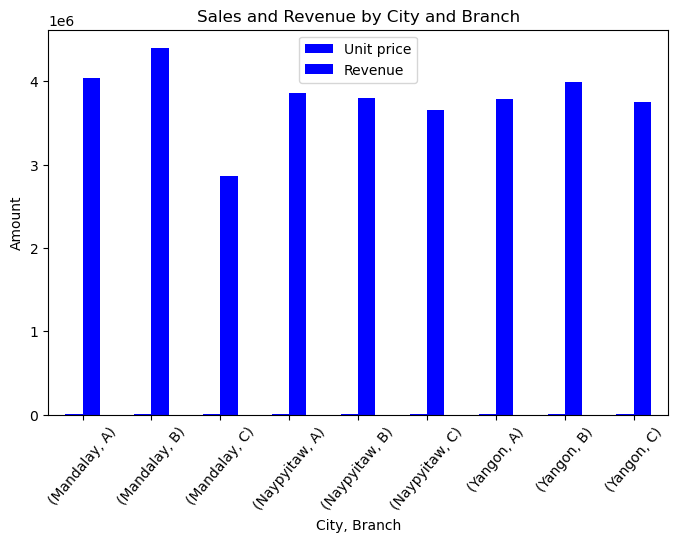

In [82]:
city_branch_sales[['Unit price', 'Revenue']].plot(kind='bar',color="b", figsize=(8, 5))
plt.title('Sales and Revenue by City and Branch')
plt.xlabel('City, Branch')
plt.ylabel('Amount')
plt.xticks(rotation=50)
plt.show()

## Question 2 What is the average price of an item sold at each branch of the city?

In [13]:
average_price = data.groupby(['City', 'Branch'])['Unit price'].mean()
print(average_price)

City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64


### Visualization

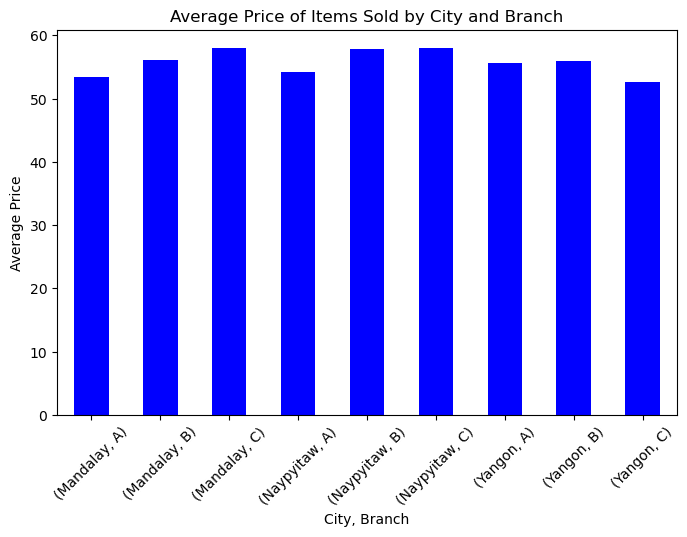

In [83]:
average_price.plot(kind='bar',color="b", figsize=(8, 5))
plt.title('Average Price of Items Sold by City and Branch')
plt.xlabel('City, Branch')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

## Question 1 C


### Performace of sales and revenue across Product line

In [69]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
product_line_monthly_sales = data.groupby(['Product line', 'Month']).agg({'Unit price': 'sum', 'Quantity': 'sum'})
product_line_monthly_sales['Revenue'] = product_line_monthly_sales['Unit price'] * product_line_monthly_sales['Quantity']
print(product_line_monthly_sales)

                              Unit price  Quantity     Revenue
Product line           Month                                  
Electronic accessories 1         2950.21       333   982419.93
                       2         2938.94       313   919888.22
                       3         3214.62       325  1044751.50
Fashion accessories    1         3543.65       336  1190666.40
                       2         3716.89       295  1096482.55
                       3         2912.81       271   789371.51
Food and beverages     1         3237.38       325  1052148.50
                       2         3367.99       349  1175428.51
                       3         3140.17       278   872967.26
Health and beauty      1         2857.81       254   725883.74
                       2         2486.34       266   661366.44
                       3         2993.73       334   999905.82
Home and lifestyle     1         3337.09       342  1141284.78
                       2         2100.08       205   43

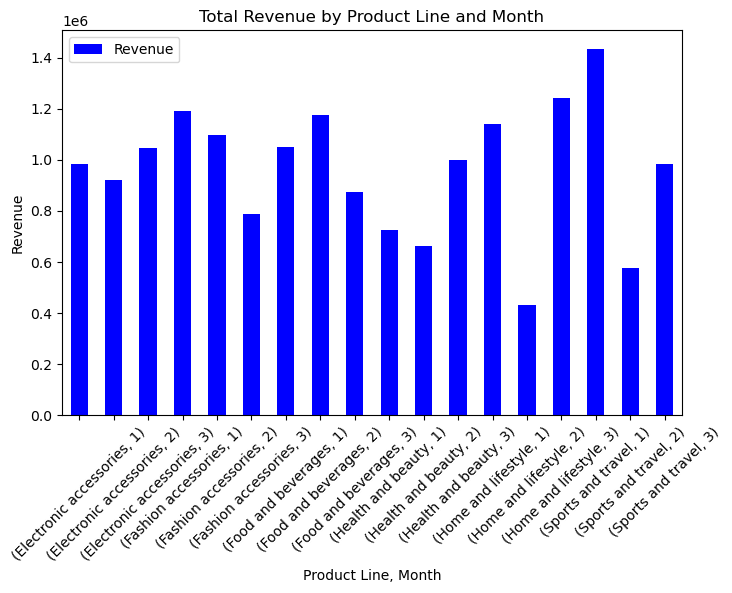

In [90]:
product_line_monthly_sales[['Revenue']].plot(kind='bar',color="b",figsize=(8, 5))
plt.title('Total Revenue by Product Line and Month')
plt.xlabel('Product Line, Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Performace of sales and revenue across Gender

In [72]:
gender_monthly_sales = data.groupby(['Gender', 'Month']).agg({'Unit price': 'sum', 'Quantity': 'sum'})
gender_monthly_sales['Revenue'] = gender_monthly_sales['Unit price'] * gender_monthly_sales['Quantity']
print(gender_monthly_sales)

              Unit price  Quantity      Revenue
Gender Month                                   
Female 1         9728.67      1019   9913514.73
       2         9320.19       951   8863500.69
       3         8638.38       899   7765903.62
Male   1        10025.22       946   9483858.12
       2         7839.33       703   5511048.99
       3        10120.34       992  10039377.28


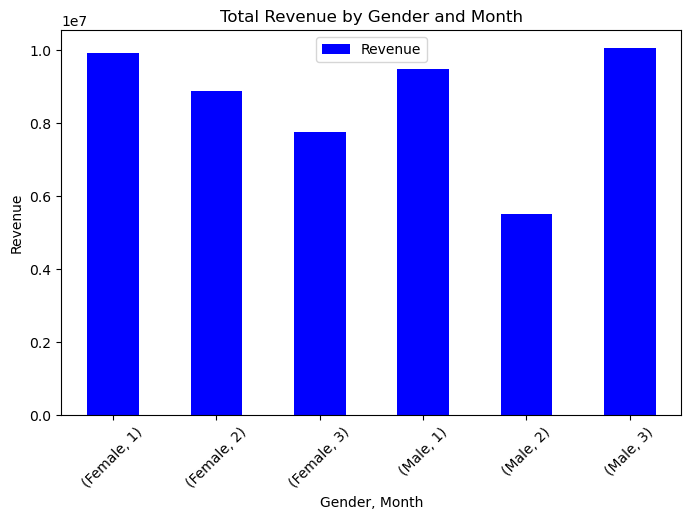

In [91]:
gender_monthly_sales[['Revenue']].plot(kind='bar',color="blue",figsize=(8, 5))
plt.title('Total Revenue by Gender and Month')
plt.xlabel('Gender, Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Performace of sales and revenue across payment method

In [71]:
payment_method_monthly_sales = data.groupby(['Payment', 'Month']).agg({'Unit price': 'sum', 'Quantity': 'sum'})
payment_method_monthly_sales['Revenue'] = payment_method_monthly_sales['Unit price'] * payment_method_monthly_sales['Quantity']
print(payment_method_monthly_sales)

                   Unit price  Quantity     Revenue
Payment     Month                                  
Cash        1         6838.76       708  4841842.08
            2         6460.15       596  3850249.40
            3         6226.18       592  3685898.56
Credit card 1         6420.10       622  3993302.20
            2         5265.14       505  2658895.70
            3         5231.44       595  3112706.80
Ewallet     1         6495.03       635  4124344.05
            2         5434.23       553  3005129.19
            3         7301.10       704  5139974.40


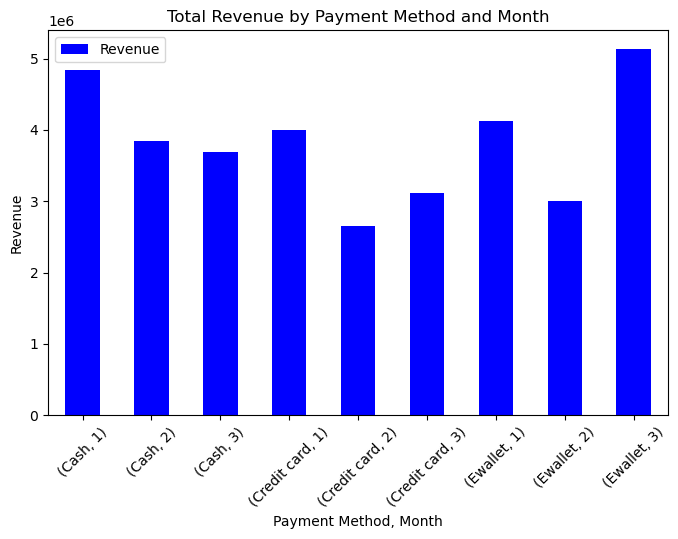

In [92]:
payment_method_monthly_sales[['Revenue']].plot(kind='bar',color="b", figsize=(8, 5))
plt.title('Total Revenue by Payment Method and Month')
plt.xlabel('Payment Method, Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## Question 3 Which product line contributes the most to the total revenue, and what is the percentage contribution of each product line to the total revenue?



In [9]:
product_revenue = data.groupby('Product line')['Unit price'].sum()
total_revenue = data['Unit price'].sum()
percentage_contribution = (product_revenue / total_revenue) * 100

print("Product line contribution to total revenue:")
print(product_revenue)
print("\nPercentage contribution of each product line to total revenue:")
print(percentage_contribution)

Product line contribution to total revenue:
Product line
Electronic accessories     9103.77
Fashion accessories       10173.35
Food and beverages         9745.54
Health and beauty          8337.88
Home and lifestyle         8850.71
Sports and travel          9460.88
Name: Unit price, dtype: float64

Percentage contribution of each product line to total revenue:
Product line
Electronic accessories    16.352473
Fashion accessories       18.273686
Food and beverages        17.505240
Health and beauty         14.976758
Home and lifestyle        15.897919
Sports and travel         16.993925
Name: Unit price, dtype: float64


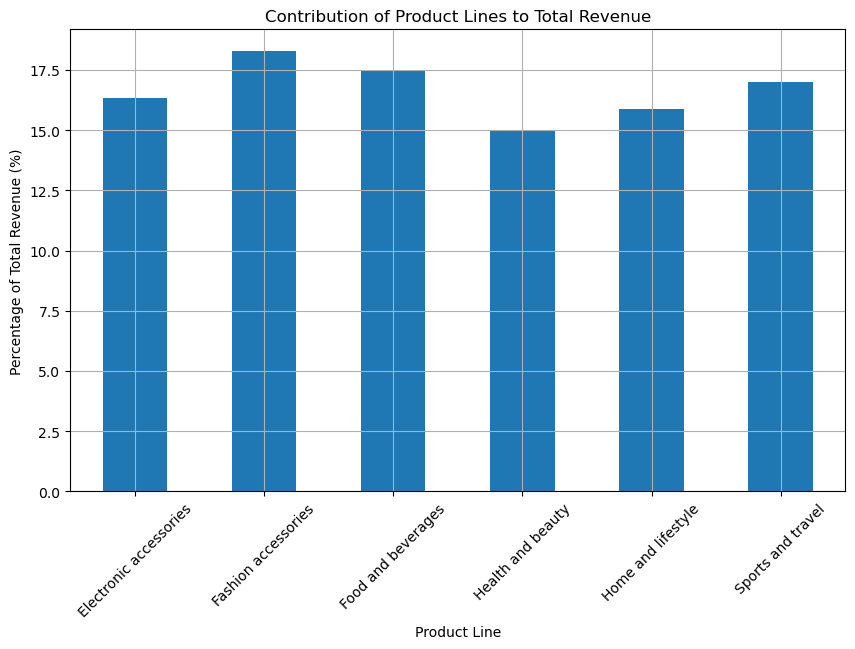

In [32]:
product_revenue = data.groupby('Product line')['Unit price'].sum()
total_revenue = data['Unit price'].sum()
percentage_contribution = (product_revenue / total_revenue) * 100

plt.figure(figsize=(10, 6))
percentage_contribution.plot(kind='bar')
plt.title('Contribution of Product Lines to Total Revenue')
plt.xlabel('Product Line')
plt.ylabel('Percentage of Total Revenue (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Question 4) What is the trend of sales over time (e.g., monthly or quarterly)?

In [31]:
data['month_year'] = data['Date'].dt.strftime('%Y-%m')
monthly_sales = data.groupby('month_year')['Unit price'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

## Question 5) Are there any correlations between variables, such as quantity sold and rating?

In [18]:
correlation = data[['Quantity', 'Rating']].corr()
print("Correlation between quantity sold and rating:")
print(correlation)

Correlation between quantity sold and rating:
          Quantity    Rating
Quantity  1.000000 -0.015815
Rating   -0.015815  1.000000


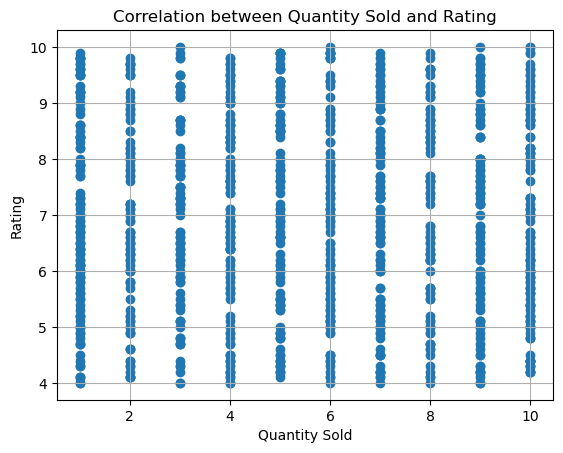

In [30]:
plt.scatter(data['Quantity'], data['Rating'])
plt.title('Correlation between Quantity Sold and Rating')
plt.xlabel('Quantity Sold')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

## Question 6) What is the distribution of ratings given by different customer types?

In [20]:
rating_distribution = data.groupby('Customer type')['Rating'].value_counts(normalize=True).unstack()
print("Rating distribution by customer type:")
print(rating_distribution)

Rating distribution by customer type:
Rating             4.0       4.1       4.2       4.3       4.4       4.5   \
Customer type                                                               
Member         0.013972  0.017964  0.021956  0.021956  0.013972  0.019960   
Normal         0.008016  0.016032  0.022044  0.014028  0.020040  0.014028   

Rating             4.6       4.7       4.8       4.9   ...      9.1   \
Customer type                                          ...             
Member         0.011976  0.015968  0.011976  0.019960  ...  0.015968   
Normal         0.004008  0.008016  0.014028  0.016032  ...  0.012024   

Rating             9.2       9.3       9.4       9.5       9.6       9.7   \
Customer type                                                               
Member         0.011976  0.009980  0.011976  0.027944  0.013972  0.015968   
Normal         0.020040  0.022044  0.012024  0.016032  0.020040  0.012024   

Rating             9.8       9.9       10.0  
Customer 

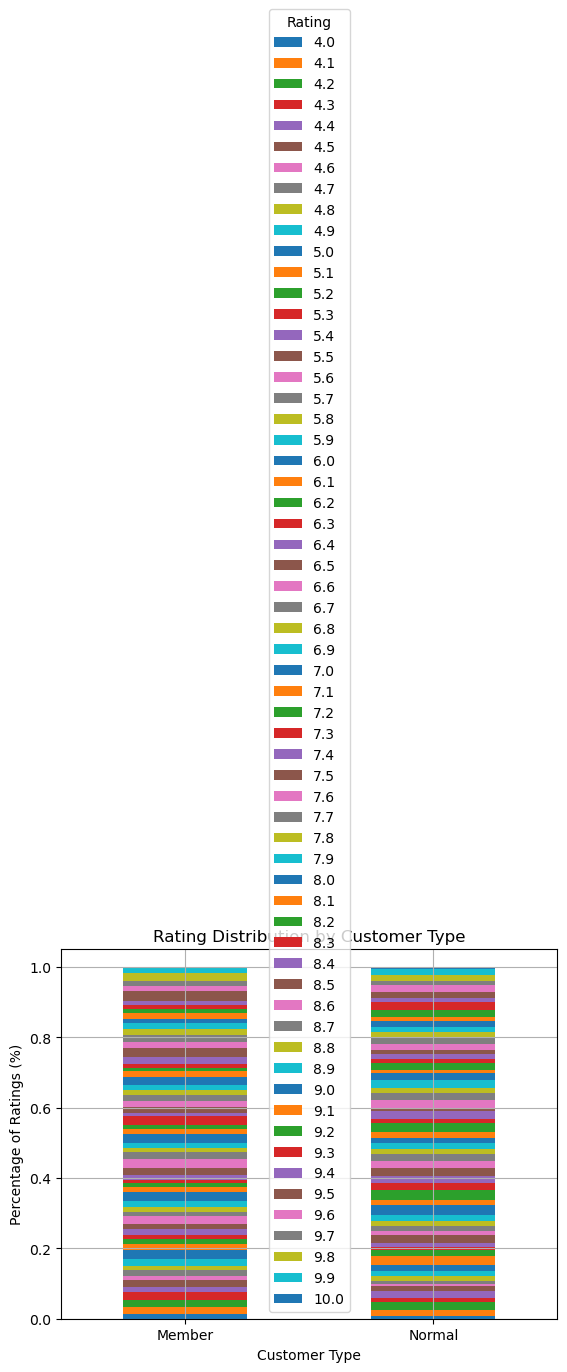

In [27]:
rating_distribution = data.groupby('Customer type')['Rating'].value_counts(normalize=True).unstack()
rating_distribution.plot(kind='bar', stacked=True)
plt.title('Rating Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Percentage of Ratings (%)')
plt.legend(title='Rating')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Question 7) Which payment type is the most preferred among different cities?

In [24]:
preferred_payment = data.groupby('City')['Payment'].value_counts().unstack()
print("Preferred payment type by city:")
print(preferred_payment)

Preferred payment type by city:
Payment    Cash  Credit card  Ewallet
City                                 
Mandalay    110          109      113
Naypyitaw   124           98      106
Yangon      110          104      126


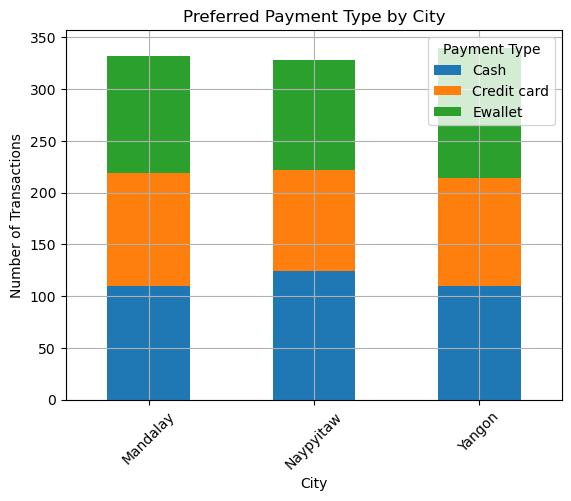

In [26]:
preferred_payment = data.groupby('City')['Payment'].value_counts().unstack()
preferred_payment.plot(kind='bar', stacked=True)
plt.title('Preferred Payment Type by City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()